In [18]:
# UCB MAB baseline
# UCB = empirical mean of specific arm + sqrt(2 log t/N_t), where N_t = number of trials of specific arm
import time, sys
from os.path import dirname, abspath
sys.path.append("/home/leduc/Deep-CFR/")
sys.path.append("/home/leduc/PokerRL/")
import numpy as np
from PokerRL.game.AgentTournament import AgentTournament
from H2HEvaluator import H2HEval
# UCB MAB baseline
# UCB = empirical mean of specific arm + sqrt(2 log t/N_t), where N_t = number of trials of specific arm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sys.path.append("/home/leduc/opp-modelling")

from ucb import MAB

In [3]:
from PokerRL.rl.base_cls.EvalAgentBase import EvalAgentBase as _EvalAgentBase
from PokerRL.game.games import StandardLeduc  # or any other game
from DeepCFR.EvalAgentDeepCFR import EvalAgentDeepCFR
from DeepCFR.TrainingProfile import TrainingProfile
from DeepCFR.workers.driver.Driver import Driver

t_prof = TrainingProfile(name="MAB",
                                         nn_type="feedforward",
                                         max_buffer_size_adv=3e6,
                                         eval_agent_export_freq=20,  # export API to play against the agent
                                         n_traversals_per_iter=1500,
                                         n_batches_adv_training=750,
                                         n_batches_avrg_training=2000,
                                         n_merge_and_table_layer_units_adv=64,
                                         n_merge_and_table_layer_units_avrg=64,
                                         n_units_final_adv=64,
                                         n_units_final_avrg=64,
                                         mini_batch_size_adv=2048,
                                         mini_batch_size_avrg=2048,
                                         init_adv_model="last",
                                         init_avrg_model="last",
                                         use_pre_layers_adv=False,
                                         use_pre_layers_avrg=False,

                                         game_cls=StandardLeduc,

                                         # You can specify one or both modes. Choosing both is useful to compare them.
                                         eval_modes_of_algo=(
                                             EvalAgentDeepCFR.EVAL_MODE_SINGLE,  # SD-CFR
                                             EvalAgentDeepCFR.EVAL_MODE_AVRG_NET,  # Deep CFR
                                         ),

                                         DISTRIBUTED=False,
                                         )

 ************************** Initing args for:  MAB   **************************


In [9]:
avg_agents = ["/home/leduc/poker_ai_data/eval_agent/SD-CFR_LEDUC_EXAMPLE_200/" + str(20 * i) + "/eval_agentAVRG_NET.pkl" for i in range(1,6)]
single_agents = ["/home/leduc/poker_ai_data/eval_agent/SD-CFR_LEDUC_EXAMPLE_200/" + str(20 * i) + "/eval_agentSINGLE.pkl" for i in range(1,6)]
agents = avg_agents + single_agents
agents = [EvalAgentDeepCFR.load_from_disk(path_to_eval_agent=agents[i]) for i in range(len(agents))]
cfr2_path = "/home/leduc/poker_ai_data/eval_agent/SD-CFR_LEDUC_EXAMPLE_2/2/eval_agentAVRG_NET.pkl"
cfr2 = EvalAgentDeepCFR.load_from_disk(path_to_eval_agent=cfr2_path)
cfr20_path = "/home/leduc/poker_ai_data/eval_agent/SD-CFR_LEDUC_EXAMPLE_30/20/eval_agentAVRG_NET.pkl"
cfr20 = EvalAgentDeepCFR.load_from_disk(path_to_eval_agent=cfr20_path)

In [36]:
n_episodes = 100
n_hands = 10
bandit = MAB(agents, cfr2, gamma = 0.5, n_hands = n_hands)
bandit.run(n_episodes)


Played 20 hands of poker.
Player  AVRG_NET: 2150.0 +/- 2299.4525517716997
Player  AVRG_NET: -2150.0 +/- 2299.4525517716997
UCB List:  [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
best agent, reward, arm_times, avg reward 0 2150.0 1 2150.0

Played 20 hands of poker.
Player  AVRG_NET: 100.0 +/- 2119.610832023753
Player  AVRG_NET: -100.0 +/- 2119.610832023753

Played 20 hands of poker.
Player  AVRG_NET: 1650.0 +/- 2393.588436905482
Player  AVRG_NET: -1650.0 +/- 2393.588436905482
UCB List:  [2150.588705011258, inf, inf, inf, inf, inf, inf, inf, inf, inf]
best agent, reward, arm_times, avg reward 1 1650.0 1 1650.0

Played 20 hands of poker.
Player  AVRG_NET: -1100.0 +/- 2003.1351953136991
Player  AVRG_NET: 1100.0 +/- 2003.1351953136991

Played 20 hands of poker.
Player  AVRG_NET: 800.0 +/- 1509.32721888553
Player  AVRG_NET: -800.0 +/- 1509.32721888553
UCB List:  [2150.7411519036837, 1650.7411519036837, inf, inf, inf, inf, inf, inf, inf, inf]
best agent, reward, arm_times, avg reward 


Played 20 hands of poker.
Player  AVRG_NET: 1300.0 +/- 2467.966036698573
Player  AVRG_NET: -1300.0 +/- 2467.966036698573

Played 20 hands of poker.
Player  SINGLE: 1100.0 +/- 1736.0111125790852
Player  AVRG_NET: -1100.0 +/- 1736.0111125790852
UCB List:  [125.85796838216312, 825.6066752610712, 801.2133505221424, 651.2133505221424, 851.2133505221424, 1375.857968382163, 1001.2133505221424, 800.6066752610712, 701.2133505221424, -48.78664947785761]
best agent, reward, arm_times, avg reward 5 1100.0 3 1283.3333333333333

Played 20 hands of poker.
Player  AVRG_NET: 1400.0 +/- 1694.0116220603218
Player  AVRG_NET: -1400.0 +/- 1694.0116220603218

Played 20 hands of poker.
Player  SINGLE: 450.0 +/- 1310.9674432230954
Player  AVRG_NET: -450.0 +/- 1310.9674432230954
UCB List:  [125.86540919130114, 825.6119367076702, 801.2238734153404, 651.2238734153404, 851.2238734153404, 1284.0399369791342, 1001.2238734153404, 800.6119367076702, 701.2238734153404, -48.77612658465959]
best agent, reward, arm_times


Played 20 hands of poker.
Player  SINGLE: 950.0 +/- 1642.6331038171256
Player  AVRG_NET: -950.0 +/- 1642.6331038171256
UCB List:  [125.94278153109421, 800.5962673948397, 300.9427815310942, 651.3332944276283, 400.9427815310942, 681.7213907655471, 800.471390765547, 800.6666472138141, 701.3332944276283, -48.66670557237169]
best agent, reward, arm_times, avg reward 7 950.0 5 830.0

Played 20 hands of poker.
Player  AVRG_NET: -100.0 +/- 2026.96587578521
Player  AVRG_NET: 100.0 +/- 2026.96587578521

Played 20 hands of poker.
Player  SINGLE: 150.0 +/- 1966.2375406391968
Player  AVRG_NET: -150.0 +/- 1966.2375406391968
UCB List:  [125.94650923641242, 800.59862500269, 300.9465092364124, 651.3385661990459, 400.9465092364124, 681.7232546182062, 800.473254618206, 830.59862500269, 701.3385661990459, -48.66143380095415]
best agent, reward, arm_times, avg reward 7 150.0 6 716.6666666666666

Played 20 hands of poker.
Player  AVRG_NET: 450.0 +/- 2108.594821295999
Player  AVRG_NET: -450.0 +/- 2108.59482


Played 20 hands of poker.
Player  AVRG_NET: -550.0 +/- 1846.331504877802
Player  AVRG_NET: 550.0 +/- 1846.331504877802

Played 20 hands of poker.
Player  SINGLE: 50.0 +/- 2024.9512920878099
Player  AVRG_NET: -50.0 +/- 2024.9512920878099
UCB List:  [125.99388677908772, 607.6741119726557, 300.99388677908775, 651.4055681624492, 400.99388677908775, 681.7469433895438, 771.735291547564, 717.240487466117, 701.4055681624492, -48.594431837550836]
best agent, reward, arm_times, avg reward 6 50.0 22 738.6363636363636

Played 20 hands of poker.
Player  AVRG_NET: 1700.0 +/- 2302.895576745937
Player  AVRG_NET: -1700.0 +/- 2302.895576745937

Played 20 hands of poker.
Player  SINGLE: 800.0 +/- 2329.8457161676292
Player  AVRG_NET: -800.0 +/- 2329.8457161676292
UCB List:  [125.99627956838833, 607.675390972336, 300.99627956838833, 651.40895207753, 400.99627956838833, 681.7481397841941, 738.9367532286037, 717.2418689436638, 701.40895207753, -48.59104792247002]
best agent, reward, arm_times, avg reward 6 


Played 20 hands of poker.
Player  SINGLE: 450.0 +/- 1430.0949517387774
Player  AVRG_NET: -450.0 +/- 1430.0949517387774
UCB List:  [126.02884723168667, 607.6927991206146, 301.02884723168665, 651.4550097086614, 401.02884723168665, 681.7644236158434, 634.9007354960358, 486.2642276920432, 1087.9200251234845, -48.544990291338706]
best agent, reward, arm_times, avg reward 8 450.0 13 1038.4615384615386

Played 20 hands of poker.
Player  AVRG_NET: 450.0 +/- 2266.640560146992
Player  AVRG_NET: -450.0 +/- 2266.640560146992

Played 20 hands of poker.
Player  SINGLE: 350.0 +/- 2125.831988032583
Player  AVRG_NET: -350.0 +/- 2125.831988032583
UCB List:  [126.03059391154437, 607.6937327602706, 301.0305939115444, 651.4574798870052, 401.0305939115444, 681.7652969557722, 634.9012199378658, 486.2651613316992, 1038.8657706511967, -48.5425201129948]
best agent, reward, arm_times, avg reward 8 350.0 14 989.2857142857144

Played 20 hands of poker.
Player  AVRG_NET: 800.0 +/- 1583.8449878226402
Player  AVRG_


Played 20 hands of poker.
Player  SINGLE: 2050.0 +/- 2414.362788041294
Player  AVRG_NET: -2050.0 +/- 2414.362788041294
UCB List:  [126.05387988600341, 607.7061796371767, 301.0538798860034, 651.4904112278982, 401.0538798860034, 1311.4624044064456, 634.9076783051667, 486.27760820860533, 661.4624044064457, -48.50958877210175]
best agent, reward, arm_times, avg reward 5 2050.0 19 1350.0

Played 20 hands of poker.
Player  AVRG_NET: -550.0 +/- 2117.684415787934
Player  AVRG_NET: 550.0 +/- 2117.684415787934

Played 20 hands of poker.
Player  SINGLE: 1500.0 +/- 1836.0291797917337
Player  AVRG_NET: -1500.0 +/- 1836.0291797917337
UCB List:  [126.055266233736, 607.7069206712101, 301.055266233736, 651.4923718196638, 401.055266233736, 1350.342373576216, 634.9080628088462, 486.2783492426388, 661.4628665223565, -48.50762818033616]
best agent, reward, arm_times, avg reward 5 1500.0 20 1357.5

Played 20 hands of poker.
Player  AVRG_NET: 1400.0 +/- 1845.9411712614797
Player  AVRG_NET: -1400.0 +/- 1845.

Text(0.5, 0, 'Hands')

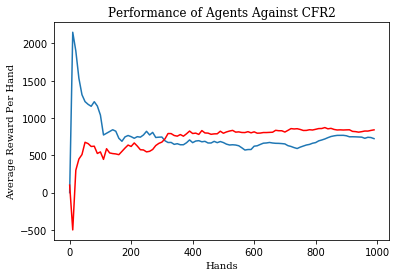

In [44]:
font = "DejaVu Serif"
x = [n_hands * i for i in range(n_episodes)]
plt.plot(x, bandit.reward_list[:-1])
# plt.fill_between(range(n_episodes), bandit.upper_bounds, bandit.lower_bounds, color='blue', alpha=.5)
plt.plot(x, bandit.nash, color = 'red')
plt.title('Performance of Agents Against CFR2', fontname = font)
plt.ylabel('Average Reward Per Hand', fontname = font)
plt.xlabel('Hands', fontname = font)

In [ ]:
# TODO: New model, oracle,

In [27]:
"""
Idea:

1. Use distillation on opponent agent to turn large strategy into smaller space (this has to be done in a Bayesian way?)
2. Compute best response to Bayesian distribution
3. Run this online?

Why does this scale better?

1. Maintaining the Bayesian distribution is impossibly expensive
    -- we have to use a point estimate but still do it in a somewhat Bayesian way
2. 
3. 
4.

"""

from RangeAgent import EvalAgentDeepRange
from TreeAgent import EvalAgentTree

from PokerRL.game.games import StandardLeduc  # or any other game
from PokerRL.eval.rl_br.RLBRArgs import RLBRArgs

from DeepCFR.EvalAgentDeepCFR import EvalAgentDeepCFR
from DeepCFR.TrainingProfile import TrainingProfile
from DeepCFR.workers.driver.Driver import Driver

rlbr_args = RLBRArgs(
    rlbr_bet_set = None
)

t_prof = TrainingProfile(
    name="DEEPCOPY_v0",
    nn_type="feedforward",
    
    max_buffer_size_adv=3e6,
    eval_agent_export_freq=20,  # export API to play against the agent
    n_traversals_per_iter=1500,
    n_batches_adv_training=750,
    n_batches_avrg_training=2000,
    n_merge_and_table_layer_units_adv=64,
    n_merge_and_table_layer_units_avrg=64,
    n_units_final_adv=64,
    n_units_final_avrg=64,
    mini_batch_size_adv=2048,
    mini_batch_size_avrg=2048,
    init_adv_model="last",
    init_avrg_model="last",
    use_pre_layers_adv=False,
    use_pre_layers_avrg=False,

    game_cls=StandardLeduc,

    # You can specify one or both modes. Choosing both is useful to compare them.
    eval_modes_of_algo=(
     # EvalAgentDeepCFR.EVAL_MODE_SINGLE,  # SD-CFR
     EvalAgentDeepCFR.EVAL_MODE_AVRG_NET,  # Deep-CFR
    ),

    DISTRIBUTED=False,
    rl_br_args=rlbr_args
)


 ************************** Initing args for:  DEEPCOPY_v0   **************************


In [28]:
import numpy as np
import torch
import torch.nn as nn

import time
from copy import deepcopy

action_loss = nn.CrossEntropyLoss()

def hole_card_onehot(hole_card):
    rank = hole_card[0][0]
    suit = hole_card[0][1]
    out = rank + suit * 3 ## arbitrary but it will learn the relationship
    return torch.LongTensor([out])

def best_response(agent):
    """
    Returns strategy that is best response to agent strategy
    """
    br = EvalAgentTree(t_prof, br_agent=agent, mode=None, device=None)
    br.mode = "BR"
    return br

def train_while_play(student_agent, enemy_agent, args={'lr':1e-2, 'iters':10000}):
    """
    Train student_agent to play against stationary enemy_agent.
    """
            
    env_bldr = student_agent.env_bldr
    env_cls = env_bldr.env_cls
    env_args = env_bldr.env_args
    lut_holder = env_cls.get_lut_holder()
    
    assert(student_agent.env_bldr.env_cls == enemy_agent.env_bldr.env_cls)
    assert(env_args.n_seats == 2)

    optimizer = torch.optim.Adam(list(student_agent.policy[0]._net.parameters()) + \
                                 list(student_agent.policy[1]._net.parameters()), lr=args['lr'])
    start_time = time.time()
    
    REFERENCE_AGENT = 0
    
    _env = env_cls(env_args=env_args, lut_holder=lut_holder, is_evaluating=True)
    _eval_agents = [enemy_agent, deepcopy(student_agent)] # play against an new frozen copy of the BR to agent while training
    
    results = {
        "action_loss": [],
        "winnings": []
    }
    iters = 0 # number of hands played
    evals = 0 # number of teaching moments
    
    # zero grads, set net to train mode
    student_agent.policy[0]._net.train()
    student_agent.policy[1]._net.train()
    optimizer.zero_grad()

    while iters < args['iters']:
        iters += 1
        
        if iters % 200 == 0:
            print("Iters {} | Evals {} | ActionLoss {} | Winnings mBB/Hand {} | ".format(
                iters, evals, sum(results['action_loss']) / evals, sum(results["winnings"]) / iters
            ))
            
            optimizer.step()
            optimizer.zero_grad()
            
            ## _eval_agents[0] = deepcopy(student_agent)
            
            # play against an new frozen copy of the BR to agent while training
            _eval_agents[1] = best_response(deepcopy(student_agent)) 
        
        for seat_p0 in range(_env.N_SEATS):
            seat_p1 = 1 - seat_p0
            
            # """""""""""""""""
            # Reset Episode
            # """""""""""""""""
            _, r_for_all, done, info = _env.reset()
            for e in _eval_agents:
                e.reset(deck_state_dict=_env.cards_state_dict())

            # """""""""""""""""
            # Play Episode
            # """""""""""""""""

            while not done:
                p_id_acting = _env.current_player.seat_id

                if p_id_acting == seat_p0:
                    evals += 1 #increment counter
                    
                    # set student to position of agent 1, estimate range + actions
                    student_agent.set_env_wrapper(_eval_agents[REFERENCE_AGENT]._internal_env_wrapper) 
                    student_a_probs = student_agent.get_a_probs_tensor()
                    
                    # get true values 
                    action_int, _ = _eval_agents[REFERENCE_AGENT].get_action(step_env=True, need_probs=False)
                    
                    # print("True:", a_probs, range_label)
                    # print("Prediction:", student_a_probs, student_range_probs)
                    # print("Checking requires_grad:", student_a_probs.requires_grad, student_range_probs.requires_grad)
                    
                    # compute loss
                    loss = action_loss(student_a_probs.view(1,-1), torch.LongTensor([action_int]))
                    results['action_loss'].append(loss)
                    
                    # print("Loss:", rloss, aloss, loss)
                    
                    # backpropogate
                    loss.backward() # accumulate gradients over many steps
                                        
                    # notify opponent
                    _eval_agents[1 - REFERENCE_AGENT].notify_of_action(p_id_acted=p_id_acting,
                                                                       action_he_did=action_int)
                elif p_id_acting == seat_p1:
                    action_int, _ = _eval_agents[1 - REFERENCE_AGENT].get_action(step_env=True,
                                                                                 need_probs=False)
                    _eval_agents[REFERENCE_AGENT].notify_of_action(p_id_acted=p_id_acting,
                                                                   action_he_did=action_int)
                else:
                    raise ValueError("Only HU supported!")

                _, r_for_all, done, info = _env.step(action_int)
                
            # """""""""""""""""
            # Add Rews
            # """""""""""""""""
            results["winnings"].append(r_for_all[seat_p0] * _env.REWARD_SCALAR * _env.EV_NORMALIZER)
    
    end_time = time.time()
    print("Time taken", end_time - start_time)

    print(optimizer)
    
    return results

In [49]:
best_response(cfr2)

In [47]:
train_while_play(best_response(cfr2), cfr2, args={'lr':2e-2, 'iters':10})

AttributeError: 'EvalAgentTree' object has no attribute 'policy'

In [ ]:
agent_file1 = "/home/leduc/poker_ai_data/eval_agent/SD-CFR_LEDUC_EXAMPLE_200/120/eval_agentAVRG_NET.pkl"
agent_file2 = "/home/leduc/poker_ai_data/eval_agent/SD-CFR_LEDUC_EXAMPLE_200/20/eval_agentAVRG_NET.pkl"

student_agent = EvalAgentDeepRange(t_prof, mode=None, device=None)
enemy_agent = EvalAgentDeepCFR.load_from_disk(path_to_eval_agent=agent_file2)
init_agent = EvalAgentDeepCFR.load_from_disk(path_to_eval_agent=agent_file1)
student_agent.policy[0]._net.load_state_dict(init_agent.avrg_net_policies[0]._net.state_dict())
student_agent.policy[1]._net.load_state_dict(init_agent.avrg_net_policies[1]._net.state_dict())

results = train_while_play(student_agent, enemy_agent, args={'lr':2e-2, 'iters':500})

In [50]:
"""
from PokerRL.rl.base_cls.workers.ChiefBase import ChiefBase
from PokerRL.eval.rl_br.LocalRLBRMaster import LocalRLBRMaster
from PokerRL.eval.rl_br.workers.ps.Local_RLBR_ParameterServer import Local_RLBR_ParameterServer
from PokerRL.eval.rl_br.workers.la.Local_RLBR_LearnerActor import Local_RLBR_LearnerActor

eval_agent_cls = EvalAgentDeepCFR
init_agent = EvalAgentDeepCFR.load_from_disk(path_to_eval_agent=agent_file1)
# init_agent.set_mode('AVRG_NET')
chief_handle = ChiefBase(t_prof)
las = [Local_RLBR_LearnerActor(t_prof, chief_handle, eval_agent_cls) for i in range(2)]
ps = Local_RLBR_ParameterServer(t_prof, chief_handle)

master = LocalRLBRMaster(t_prof, chief_handle, eval_agent_cls)
master._eval_agent = init_agent
master._la_handles = las
master._ps_handle = ps

master.evaluate(1)

master._ps_handle.get_eval_ddqn_state_dicts()
"""

"\nfrom PokerRL.rl.base_cls.workers.ChiefBase import ChiefBase\nfrom PokerRL.eval.rl_br.LocalRLBRMaster import LocalRLBRMaster\nfrom PokerRL.eval.rl_br.workers.ps.Local_RLBR_ParameterServer import Local_RLBR_ParameterServer\nfrom PokerRL.eval.rl_br.workers.la.Local_RLBR_LearnerActor import Local_RLBR_LearnerActor\n\neval_agent_cls = EvalAgentDeepCFR\ninit_agent = EvalAgentDeepCFR.load_from_disk(path_to_eval_agent=agent_file1)\n# init_agent.set_mode('AVRG_NET')\nchief_handle = ChiefBase(t_prof)\nlas = [Local_RLBR_LearnerActor(t_prof, chief_handle, eval_agent_cls) for i in range(2)]\nps = Local_RLBR_ParameterServer(t_prof, chief_handle)\n\nmaster = LocalRLBRMaster(t_prof, chief_handle, eval_agent_cls)\nmaster._eval_agent = init_agent\nmaster._la_handles = las\nmaster._ps_handle = ps\n\nmaster.evaluate(1)\n\nmaster._ps_handle.get_eval_ddqn_state_dicts()\n"